# About Dataset:
It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave
bank or not.

# Objective:
Develop a model to predict customer churn for a subscription- based service or business. Use historical
customer data, including features like usage behavior and customer demographics, and try algorithms like
Logistic Regression, Random Forests, or Gradient Boosting to predict churn.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import os

import warnings
warnings.filterwarnings("ignore")


# Download Dataset

In [7]:
df = pd.read_csv("/content/Churn_Modelling (1).csv")

In [8]:
print("-- First 5 rows --", "\n")
df.head()

-- First 5 rows -- 



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Remove unwanted rows

In [9]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace= True)

# Check dataframe information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Null Data

In [11]:
df.isnull().sum().sum()

0

# Duplicate data

In [12]:
print("No.of duplicates: " + str(df.duplicated().sum()))

No.of duplicates: 0


In [13]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [14]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Numeric feauture

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.iloc[:, :].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='blue')

,count,mean,std,min,25%,50%,75%,max
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
Exited,10000.000000,0.203700,0.402769,0.000000,0.000000,0.000000,0.000000,1.000000


# EDA : Lets take "Excited" variable and check all the variable relationship with this.


# 1) Excited

Excited: 1

Non-Exited : 0

In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

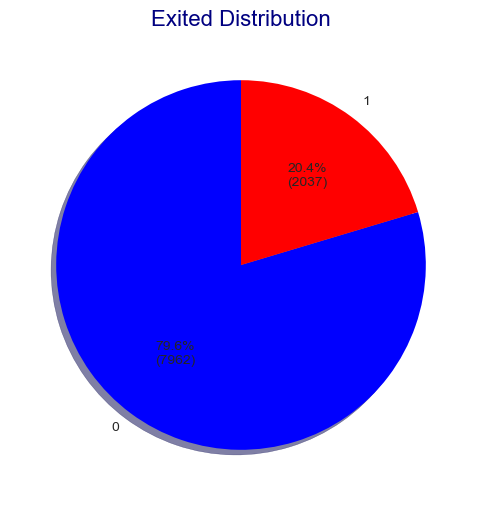

In [ ]:
ex_counts=df.Exited.value_counts()
plt.figure(figsize=(12,6))
plt.title('Exited Distribution',size=16,color='navy')


def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.pie(ex_counts,
        labels=ex_counts.index,
        autopct=lambda pct: func(pct,ex_counts),
        startangle=90,
        colors=("blue","red"),
        shadow=True);


# Conclusions - Exited


1. We can note that 7962 of Customers are in group No-exited and 2037 in group Exited. Therefore, 79.6% of Customers are in the No-exited group.

# 2) CreditScore

In [ ]:
df['CreditScore'].value_counts()

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

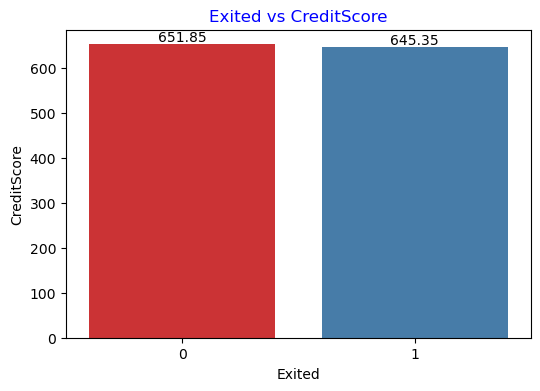

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data=df, x = 'Exited', y = 'CreditScore', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'CreditScore',color='blue')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

# Conclusions - Exited

CreditScore is practically the same for the 2 groups, with a slightly higher value for group No-exited(0).

 # 3) Geography

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

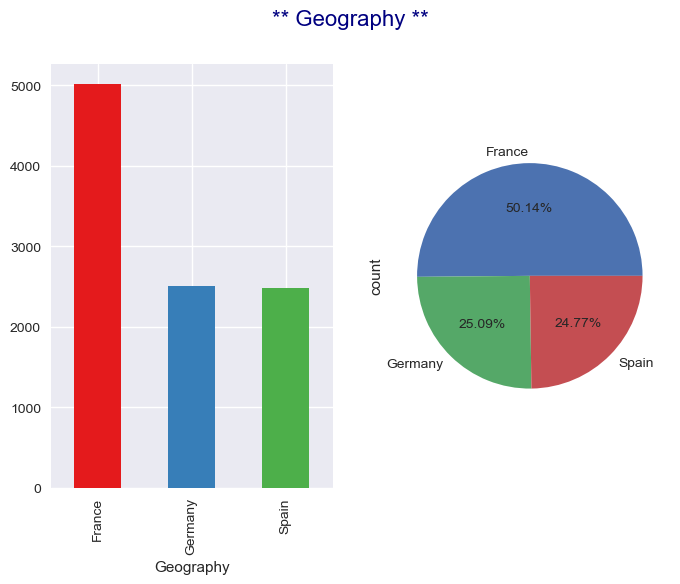

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('** ' + 'Geography' + ' **', fontsize=16, color='navy')
plt.style.use('seaborn')
plt.subplot(1,2,1)
df['Geography'].value_counts().plot(kind='bar',color=sns.color_palette("Set1"))
plt.subplot(1,2,2)
df['Geography'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

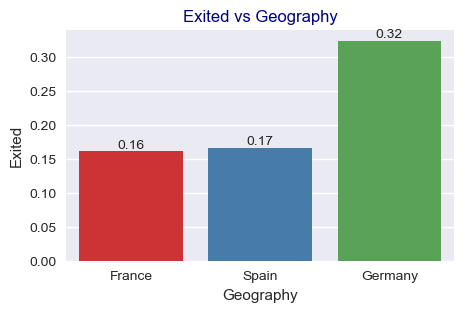

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'Geography', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Geography',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

# Conclusions - Geography


The country with the highest number of 'Exited' is Germany, with an average of 0.32. This means that in Germany 32% are from the 'Exited' group. On the other hand, France has the largest number of customers.

# 4) Gender

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

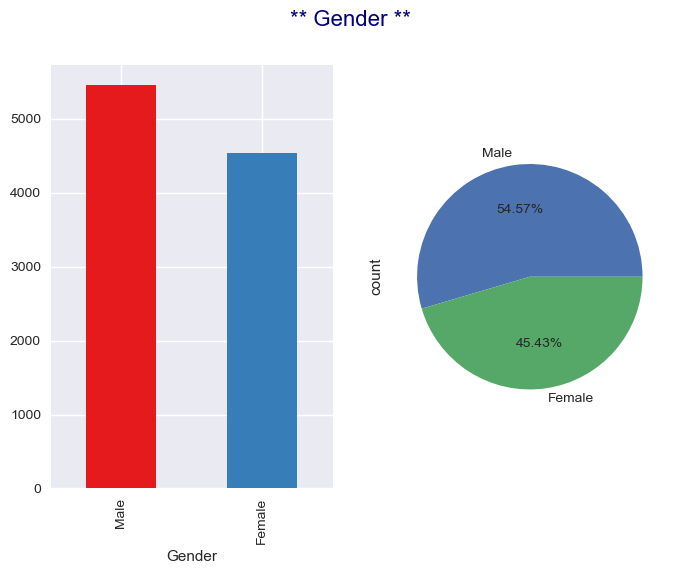

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('** ' + 'Gender' + ' **', fontsize=16, color='navy')
plt.style.use('seaborn')
plt.subplot(1,2,1)
df['Gender'].value_counts().plot(kind='bar',color=sns.color_palette("Set1"))
plt.subplot(1,2,2)
df['Gender'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

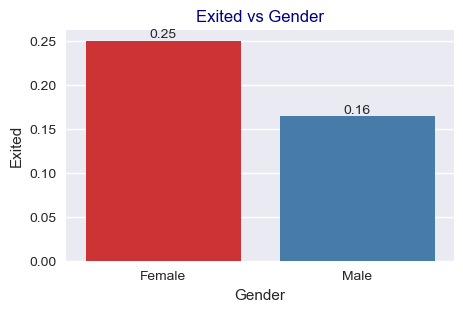

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'Gender', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Gender',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

# Conclusions - Gender

Gender with the highest number of 'Exited' is Female, with an average of 0.25. The Male gender has the majority of Customers, with 54.57%.

# 5) Age

In [ ]:
df['Age'].value_counts()

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

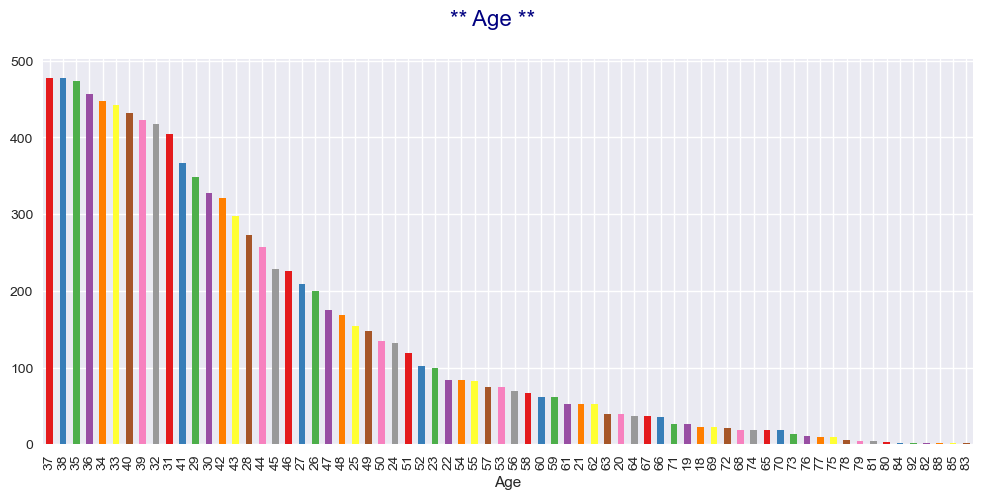

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
fig.suptitle('** ' + 'Age' + ' **', fontsize=16, color='navy')
plt.style.use('seaborn')
df['Age'].value_counts().plot(kind='bar',color=sns.color_palette("Set1"))
plt.show()

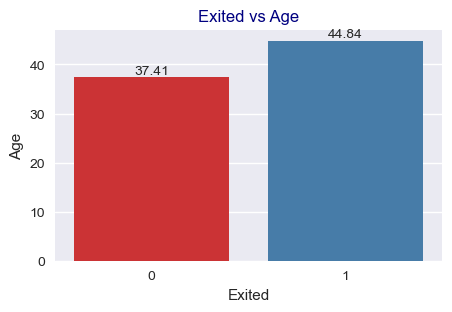

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'Exited', y = 'Age', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Age',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

# Conclusion: Age

Age with the highest mean is group 1 (Exited), with an average of 44.84 years. In other words, the 'Exited' group has a higher average age than the 'No-exited' group.

# 6) Tenure

In [ ]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

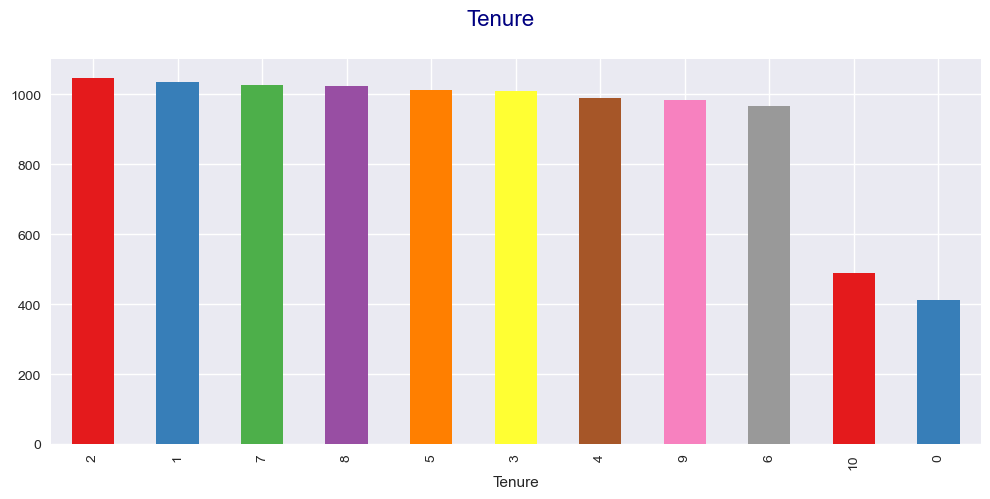

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
fig.suptitle('Tenure', fontsize=16, color='navy')
plt.style.use('seaborn')
df['Tenure'].value_counts().plot(kind='bar',color=sns.color_palette("Set1"))
plt.show()

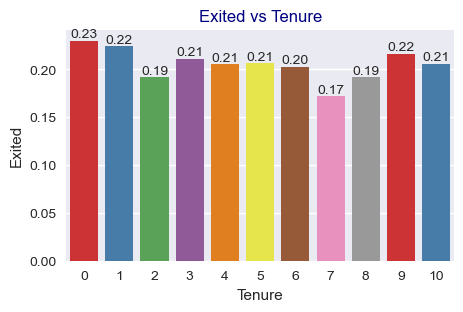

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'Tenure', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Tenure',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

# Conclusion:  Tenure

Tenure with the highest mean of 'Exited' is Tenure = 0 and the lowest is Tenure = 7. On the other hand, Tenure 2 has the highest number of Customers (1048) and Tenure 0 has the lowest (413).

# 7) Balance

In [ ]:
df['Balance'].value_counts()

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

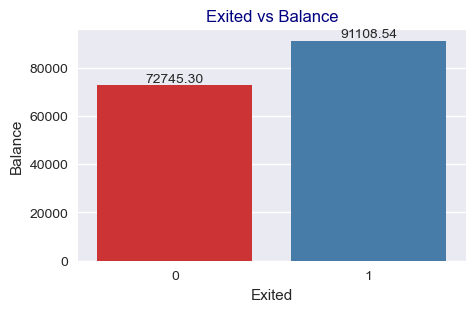

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'Exited', y = 'Balance', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Balance',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

# Conclusion: Balance

Balance with the highest mean is group 1 (Exited), with average = 91108,54.

# 8) NumOfProducts

In [ ]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

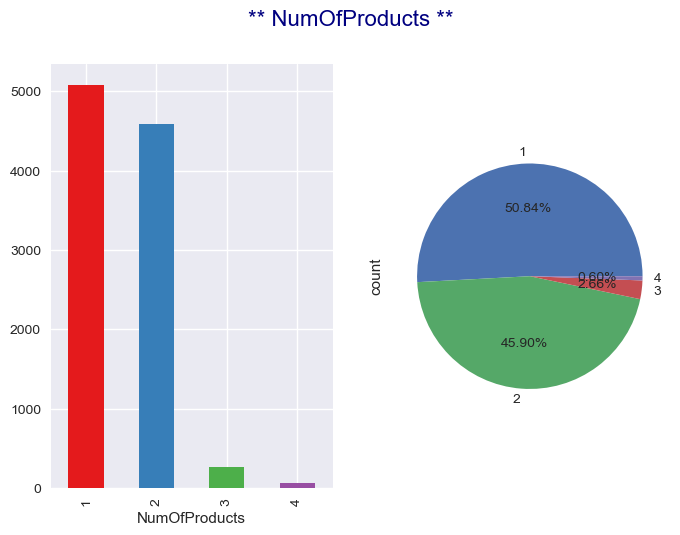

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('** ' + 'NumOfProducts' + ' **', fontsize=16, color='navy')
plt.style.use('seaborn')
plt.subplot(1,2,1)
df['NumOfProducts'].value_counts().plot(kind='bar',color=sns.color_palette("Set1"))
plt.subplot(1,2,2)
df['NumOfProducts'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

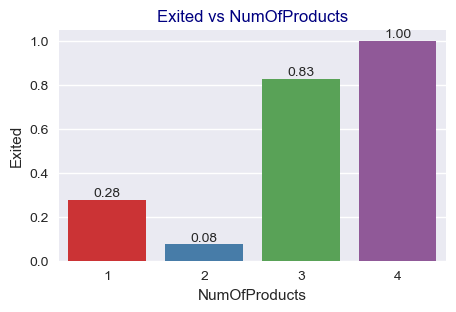

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'NumOfProducts', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'NumOfProducts',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

# Conclusions: NumOfProducts


1. Customers with 4 and 3 products have a higher average of Exited, but we must emphasize that there are few customers who have these quantities of products.

2. Customers who have 2 products are the ones with the lowest average for Exited, that is, they are the ones with the lowest propensity to Churn.

3. Reinforcing that the largest number of customers are those with 1 NumOfProducts (5084), followed by customers with 2 NumOfProducts (4590).

# 9) HasCrCard

In [ ]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

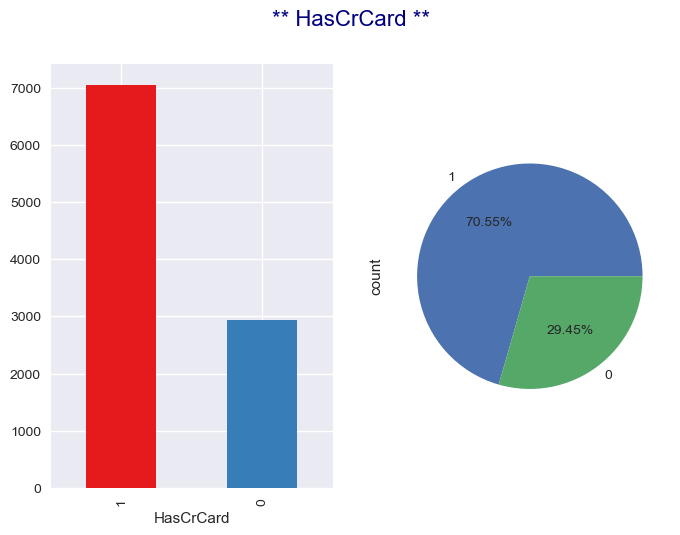

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('** ' + 'HasCrCard' + ' **', fontsize=16, color='navy')
plt.style.use('seaborn')
plt.subplot(1,2,1)
df['HasCrCard'].value_counts().plot(kind='bar',color=sns.color_palette("Set1"))
plt.subplot(1,2,2)
df['HasCrCard'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

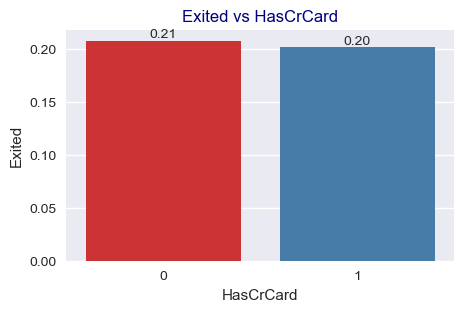

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'HasCrCard', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'HasCrCard',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

# Conclusion: HasCrCard

HasCrCard is practically the same for the 2 groups, with a slightly higher value for group 0. HasCrCard = 1 has the most customers (7055) or 70.55%.

# 10) IsActiveMember

In [ ]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

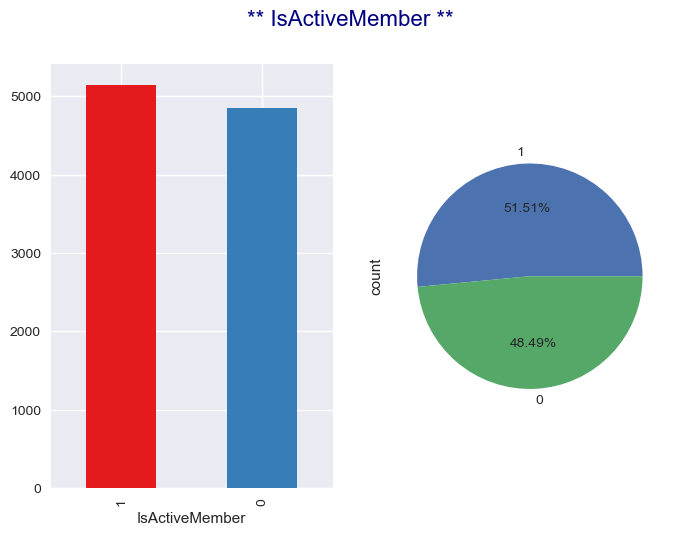

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('** ' + 'IsActiveMember' + ' **', fontsize=16, color='navy')
plt.style.use('seaborn')
plt.subplot(1,2,1)
df['IsActiveMember'].value_counts().plot(kind='bar',color=sns.color_palette("Set1"))
plt.subplot(1,2,2)
df['IsActiveMember'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

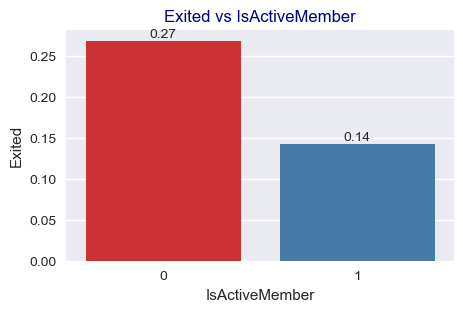

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'IsActiveMember', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'IsActiveMember',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

# Conclusions: IsActiveMember

IsActiveMember with the highest mean of 'Exited' is group 0 (No-Exited), with average = 0,27.

# 11) EstimatedSalary

In [ ]:
df['EstimatedSalary'].value_counts()

EstimatedSalary
24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: count, Length: 9999, dtype: int64

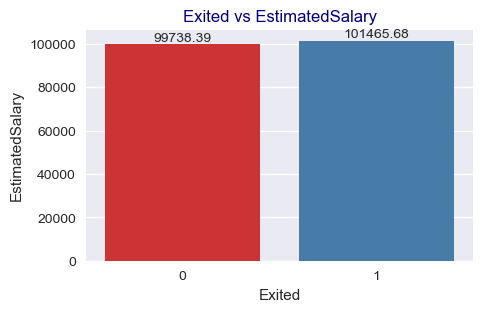

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x = 'Exited', y = 'EstimatedSalary', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'EstimatedSalary',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

# Conclusion: EstimatedSalary
EstimatedSalary is practically the same for the 2 groups, with a slightly higher value for group 1 (Exited).

#

# Machine Learning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [16]:
# transforming 'object' to numerical columns with LabelEncoder

LabelEncoder= LabelEncoder()
df2 = df.copy()
df2['Geography']=LabelEncoder.fit_transform(df2['Geography'])
df2['Gender']=LabelEncoder.fit_transform(df2['Gender'])
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


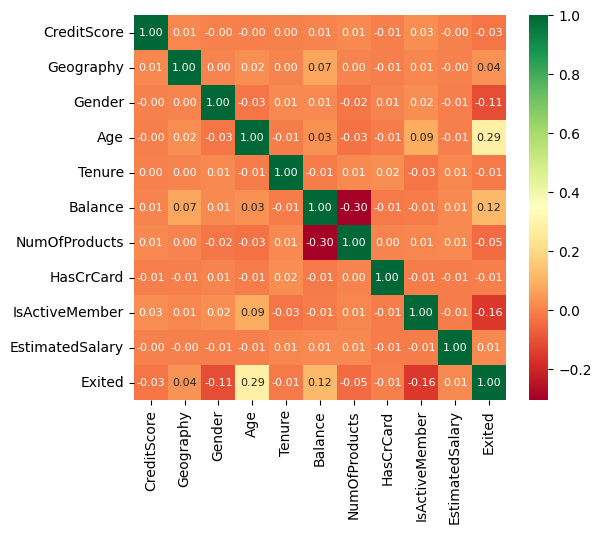

In [17]:
# Heatmap: insights into the relationships between different features in a dataset

df_corr = df2.corr()
f, ax = plt.subplots(figsize=(6, 5))

sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 8}, ax=ax)
plt.show()

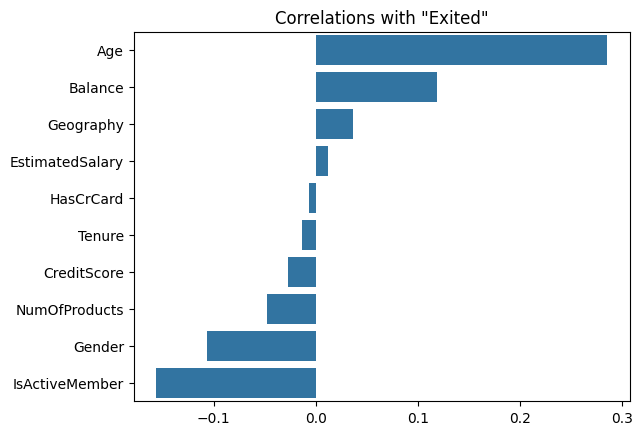

In [18]:
# Correlations with "Exited"

limit = -1.0

data = df2.corr()["Exited"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "Exited"')
plt.show()

# CatBoostClassifier

In [19]:
# assign X and y values
X,y=df2.drop("Exited",axis=1),df2[['Exited']]

In [20]:
from sklearn.model_selection import train_test_split

# split the data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7000, 10), (3000, 10), (7000, 1), (3000, 1))

In [22]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.9 MB/s eta 0:00:00


In [24]:
# Classification Algorithms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from catboost import CatBoostClassifier

ct=CatBoostClassifier(verbose=False)
ct.fit(X_train,y_train)

In [25]:
# Predict the Test set results

y_pred = ct.predict(X_test)

In [26]:
# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.8737


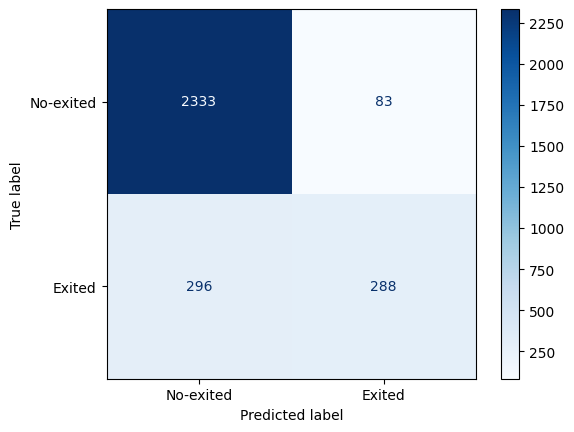

In [27]:
# ConfusionMatrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = plt.cm.Blues, normalize = None, display_labels = ['No-exited', 'Exited'])

In [28]:
# classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92      2416
           1       0.78      0.49      0.60       584

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.87      0.87      0.86      3000

